# Figure 5

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
# Print version numbers.
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
# Intialize my pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

matplotlib 3.5.2
numpy 1.22.3
pandas 1.4.2


In [2]:
# Load the datframes for figure 5.
arc_het_df = pd.read_csv('./data/archaic_het_sites_72kb.csv.gz')
tgp_het_df = pd.read_csv('./data/tgp_het_sites_72kb.csv.gz')
phased_df = pd.read_csv('./data/altai_nean_phased_late_neanderthals_denisovan_mxl_yri_233_seg_sites_72kb.csv.gz')
# Convert the dataframes to dictionaries.
arc_het_info = {col: arc_het_df[col].values for col in arc_het_df.columns.values}
tgp_het_info = {col: tgp_het_df[col].values for col in tgp_het_df.columns.values}
phased_info = {col: phased_df[col].values for col in phased_df.columns.values}

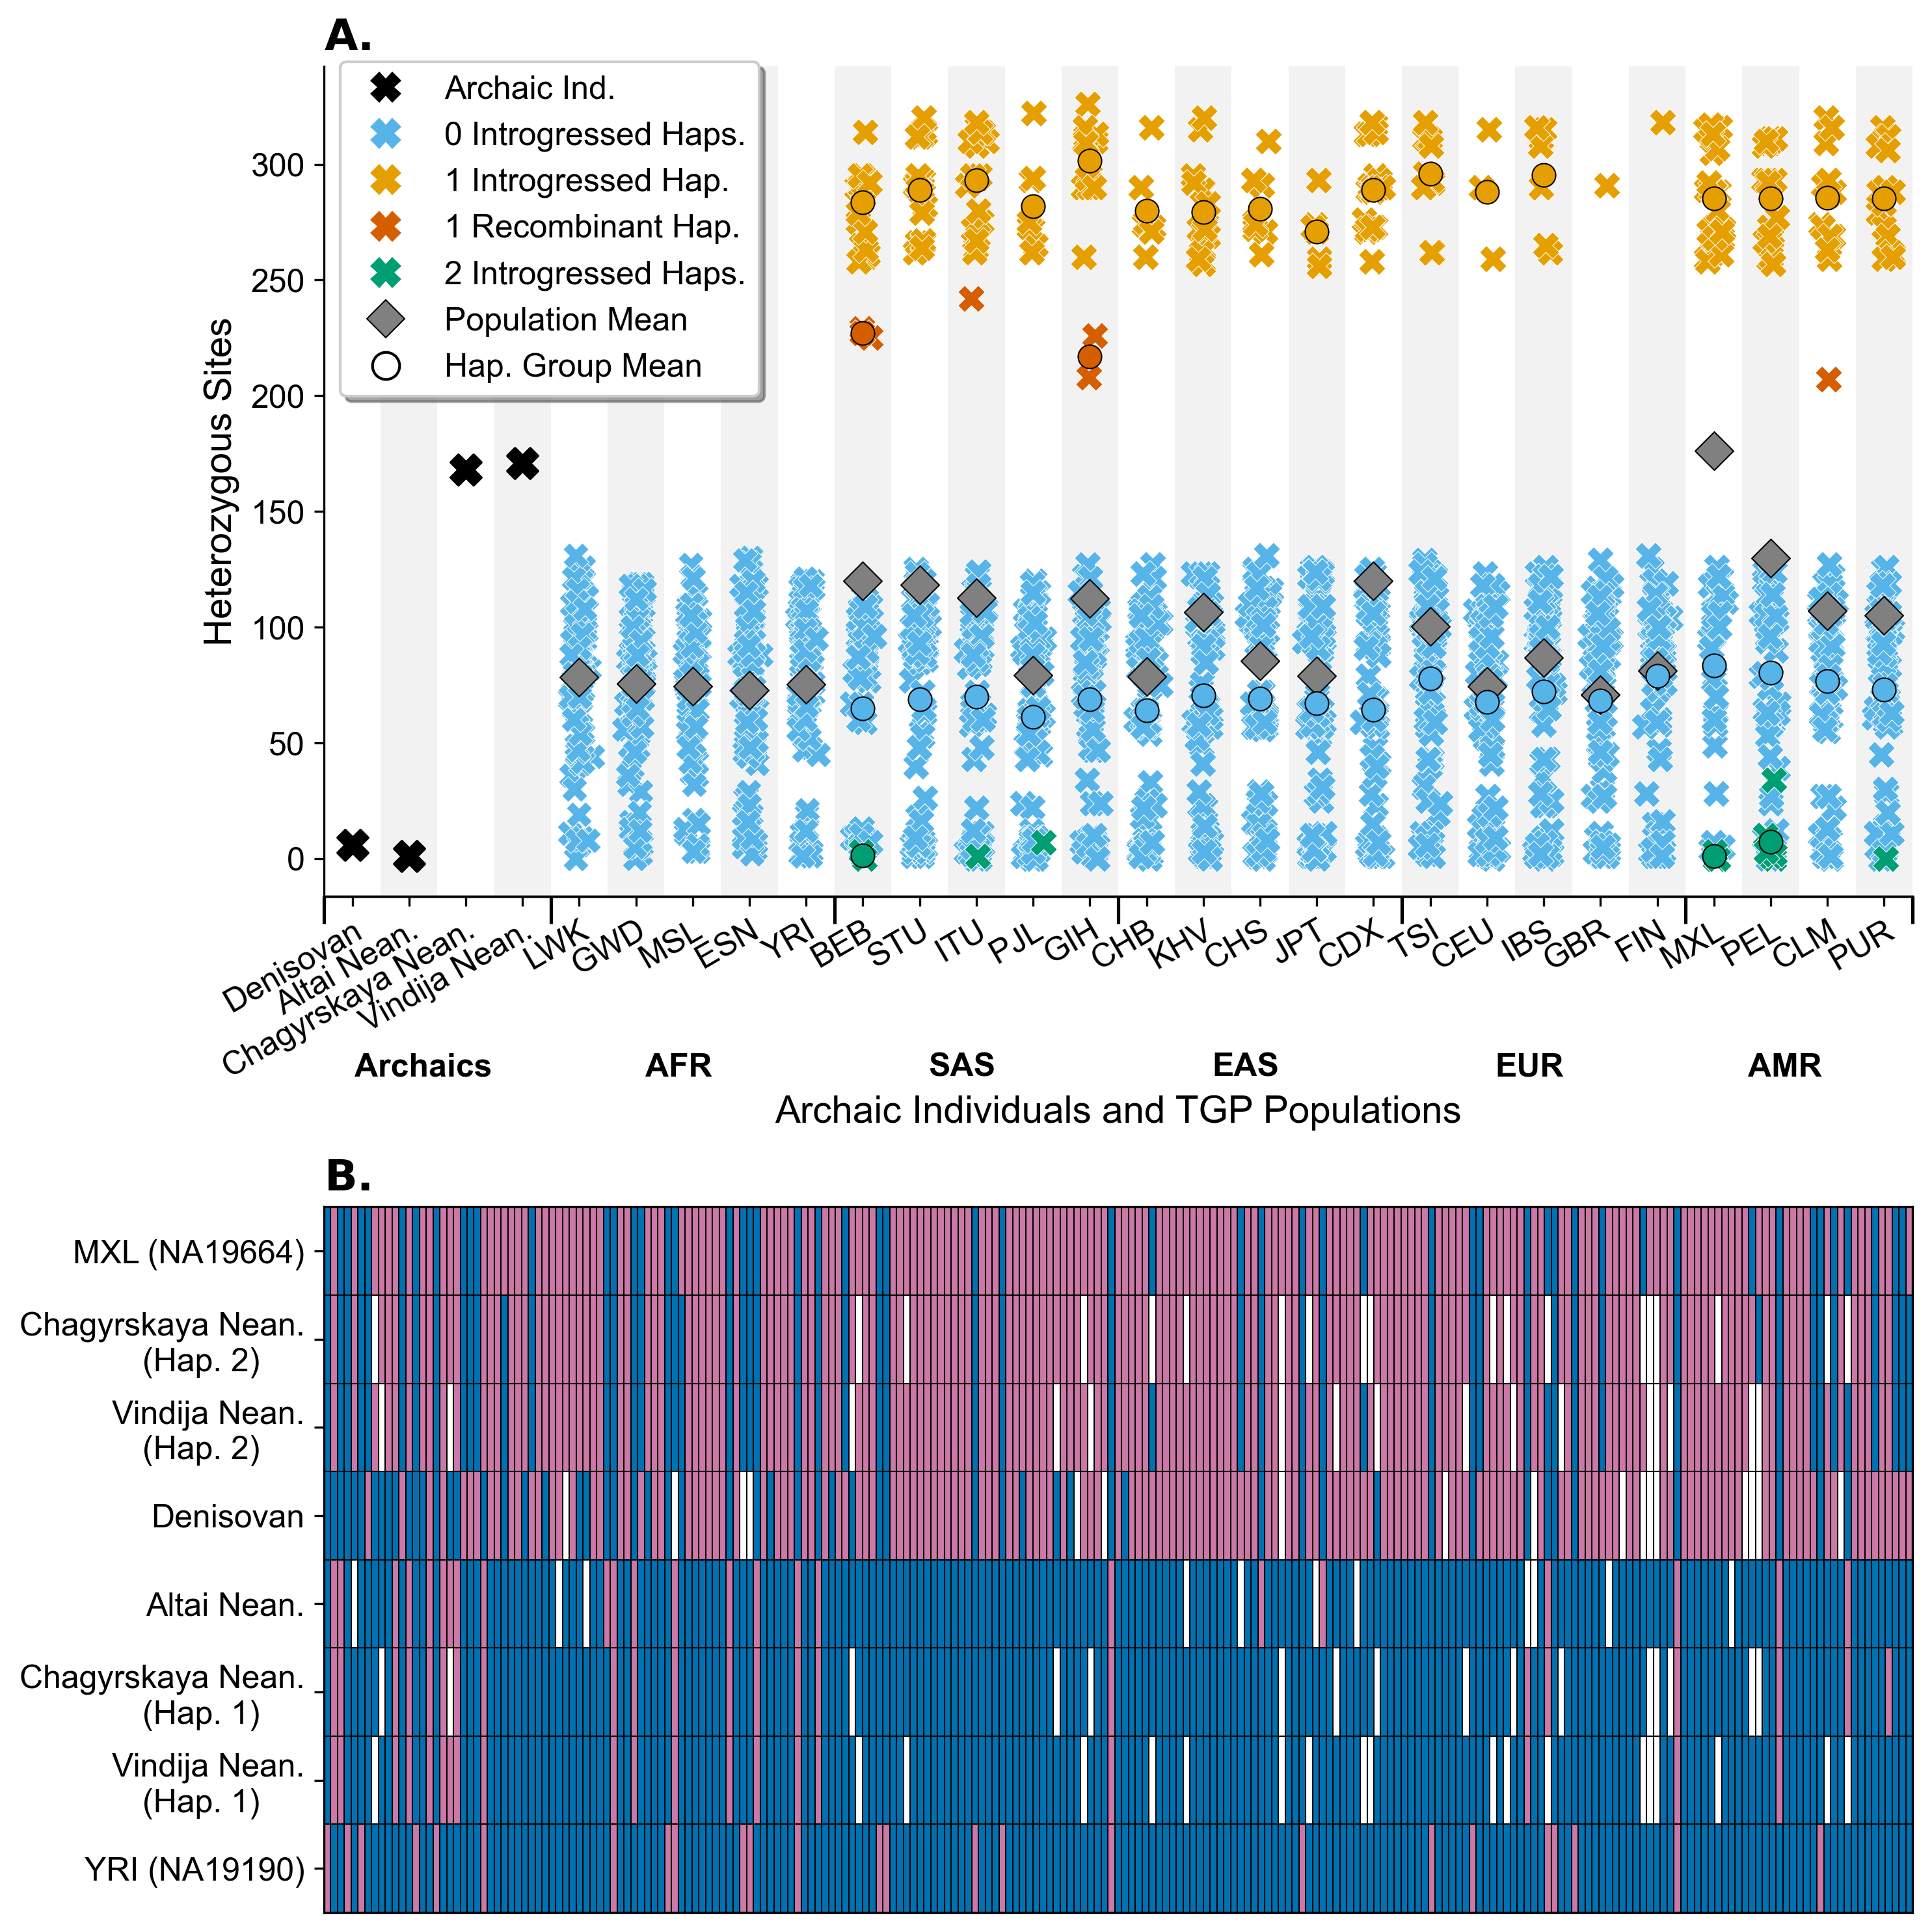

In [3]:
# Intialize the matplolib styling.
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})
# Intialize the figure.
fig = plt.figure(
    figsize=(10, 10), dpi=300,
    facecolor='white',
)
# Intialize the grid.
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.85])
# Intialize the axes.
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])



###############
### Panel A ###
###############

# Intialize a list of archaics.
arc_list = ['Denisovan', 'Altai Nean.', 'Chagyrskaya Nean.', 'Vindija Nean.']
# Intialize an ordered population list.
pop_list = [
    'LWK', 'GWD', 'MSL', 'ESN', 'YRI', # AFR.
    'BEB', 'STU', 'ITU', 'PJL', 'GIH', # SAS.
    'CHB', 'KHV', 'CHS', 'JPT', 'CDX', # EAS.    
    'TSI', 'CEU', 'IBS', 'GBR', 'FIN', # EUR.
    'MXL', 'PEL', 'CLM', 'PUR', # AMR.
]
# Create a mask for the recombinant haplotypes.
is_rec_hap = tgp_het_info['N_REC_HAPS_72KB'] == 1
# Intialize masks for the number of denisovan like haplotypes.
is_n_haps = {n: (tgp_het_info['N_DEN_HAPS_72KB'] == n) & (~is_rec_hap) for n in range(3)}
is_n_haps[3] = is_rec_hap
# Intialize the x-axis labels.
het_xlabs = np.array(arc_list + pop_list)
# Generate the label positions.
het_xlab_pos = np.arange(het_xlabs.size)
# For every other x-axis label.
for loc in np.arange(1, het_xlabs.size, 2):
    # Plot the alternating background.
    ax1.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.05)
# Plot the archaic heterozygous sites.
ax1.scatter(het_xlab_pos[:4], arc_het_info['N_HET'], color='black',marker='X', s=125)
# For every population.
for i, pop in enumerate(pop_list):
    # Create the poulation mask.
    is_pop = tgp_het_info['POP'] == pop
    # Extract the population's heterozygous site distribution.
    pop_hets = tgp_het_info['N_HET'][is_pop]
    # Plot the population mean.
    ax1.scatter(
        het_xlab_pos[4:][i], np.mean(pop_hets), color='grey', zorder=5,
        marker='D', s=100, edgecolor='black', linewidth=0.5,
    )
    # If the population has no introgressed haplotypes.
    if pop in ['LWK', 'GWD', 'MSL', 'ESN', 'YRI']:
        # Add some jitter to the x-axis.
        jitter = np.random.normal(het_xlab_pos[4:][i], 0.075, size=pop_hets.size)
        # Plot the population's data.
        ax1.scatter(
            jitter, pop_hets, color='#56B4E9', zorder=4,
            marker='X', s=90, edgecolor='white', linewidths=0.25,
        )
    # Else, the population harbors introgressed haplotypes.
    else:
        # For each introgressed tract group.
        for grp, color in [(0, '#56B4E9'), (1, '#E69F00'), (2, '#009E73'), (3, '#D55E00')]:
            # Intialize the group mask for the population.
            is_pop_grp = is_pop & is_n_haps[grp]
            # If there is at least one individual in the group.
            if is_pop_grp.sum() > 0:
                # Extract the group's heterozygous site distribution.
                grp_hets = tgp_het_info['N_HET'][is_pop_grp]
                # Add some jitter to the x-axis.
                jitter = np.random.normal(het_xlab_pos[4:][i], 0.075, size=grp_hets.size)
                # Plot the group's data.
                ax1.scatter(
                    jitter, grp_hets, color=color, zorder=4,
                    marker='X', s=100, edgecolor='white', linewidths=0.25,
                )
                # If there are at least two individuals in the group.
                if is_pop_grp.sum() > 1:
                    # Plot the group mean.
                     ax1.scatter(
                        het_xlab_pos[4:][i], np.mean(grp_hets), color=color, zorder=5,
                        marker='o', s=75, edgecolor='black', linewidth=0.5,
                    )
# Label the axes.
ax1.set_ylabel('Heterozygous Sites')
ax1.set_xlabel('Archaic Individuals and TGP Populations')
# Set the x-axis limits, tick positions, and labels.
ax1.set_xlim(-0.5, het_xlabs.size - 0.5)
ax1.set_xticks(het_xlab_pos)
ax1.set_xticklabels(
    het_xlabs, rotation=30,
    ha='right', rotation_mode='anchor',
)
# Add secondary x-axes for grouping by super population.
sec_xaxis_1 = ax1.secondary_xaxis('bottom')
sec_xaxis_2 = ax1.secondary_xaxis('bottom')
# Group the populations by super populations.
sec_xaxis_1.set_xticks([1.25, 5.75, 10.75, 15.75, 20.75, 25.25])
sec_xaxis_1.set_xticklabels(['\nArchaics', '\nAFR', '\nSAS', '\nEAS', '\nEUR', '\nAMR'], fontweight='bold')
sec_xaxis_1.tick_params(length=0)
sec_xaxis_1.xaxis.set_tick_params(pad=45)
# Plot dividers to separate the super population groups.
sec_xaxis_2.set_xticks([-0.5, 3.5, 8.5, 13.5, 18.5, 23.5, 27.5])
sec_xaxis_2.set_xticklabels([])
sec_xaxis_2.tick_params(length=10, width=1.25)
# Add a legend.
ax1.legend(
    handles=[
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#000000', label='Archaic Ind.'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#56B4E9', label='0 Introgressed Haps.'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#E69F00', label='1 Introgressed Hap.'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#D55E00', label='1 Recombinant Hap.'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#009E73', label='2 Introgressed Haps.'),
        Line2D([0], [0], linestyle='none', marker='D', markersize=10, markeredgewidth=0.5, color='grey', markeredgecolor='black', label='Population Mean'),
        Line2D([0], [0], linestyle='none', marker='o', markersize=10, color='white', markeredgecolor='black', label='Hap. Group Mean'),
    ],
    loc='upper left', bbox_to_anchor=(0, 1.025), frameon=True, fancybox=True, shadow=True,
)



###############
### Panel B ###
###############

# Intialize a haplotype matrix for plotting.
hap_mat = np.empty((8, phased_df.shape[0]))
# For every focal haplotype.
for i, hap in enumerate([
    'MXL_NA19664_HAP', 'Chagyrskaya Nean. Hap. 2', 'Vindija Nean. Hap. 2',
    'Denisovan', 'Altai Nean.',
    'Vindija Nean. Hap. 1', 'Chagyrskaya Nean. Hap. 1', 'YRI_NA19190_HAP',
]):
    # Update the haplotype matrix.
    hap_mat[i, :] = phased_info[hap]
# Intialize the labels.
hap_labs = np.array([
    'MXL (NA19664)',
    'Chagyrskaya Nean.'+'\n'+'(Hap. 2)     ',
    'Vindija Nean.'+'\n'+'(Hap. 2)     ',
    'Denisovan',
    'Altai Nean.',
    'Chagyrskaya Nean.'+'\n'+'(Hap. 1)     ',
    'Vindija Nean.'+'\n'+'(Hap. 1)     ',
    'YRI (NA19190)',
])
# Intialize color map.
cmap = ListedColormap(['#0072B2', '#CC79A7'])
# Plot the haplotype table.
im = ax2.imshow(hap_mat, cmap=cmap, aspect='auto')
# Label the rows.
ax2.set_yticks(np.arange(hap_labs.size))
ax2.set_yticklabels(hap_labs)
# Seperate each box and add a grid.
ax2.set_xticks(np.arange(0, hap_mat.shape[1], 1))
ax2.set_yticks(np.arange(0, hap_mat.shape[0], 1))
ax2.set_xticks(np.arange(-0.5, hap_mat.shape[1], 1), minor=True)
ax2.set_yticks(np.arange(-0.5, hap_mat.shape[0], 1), minor=True)
ax2.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
# Remove the ticks.
ax2.tick_params(bottom=False, labelbottom=False)
ax2.tick_params(which='minor', left=False, bottom=False, labelbottom=False)
# Add a border.
ax2.spines['top'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(True)



#################
### Exporting ###
#################

# Intilaize a title list.
title_list = [
    r'$\bf{A.}$',
    r'$\bf{B.}$',
]
# For each subplot.
for ax, title in zip([ax1, ax2], title_list):
    # Plot the title.
    ax.set_title(title, loc='left')
# Enforce a tight layout.
plt.tight_layout()
# Export the plot.
plt.savefig(
    './main_figures/png/figure_5.png', format='png',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/svg/figure_5.svg', format='svg',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/pdf/figure_5.pdf', format='pdf',
    facecolor='white', bbox_inches='tight', dpi=500,
)
# Show the plot.
plt.show()